## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [5]:
import numpy as np
a = np.array([2, 5, 4, 1])
n = len(a)
b = a[:, np.newaxis]
d = np.ones([n,1], dtype=int)
for i in range(1, n):
    c = b ** i
    d = np.hstack((c, d))
print(d)

[[  8   4   2   1]
 [125  25   5   1]
 [ 64  16   4   1]
 [  1   1   1   1]]


## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

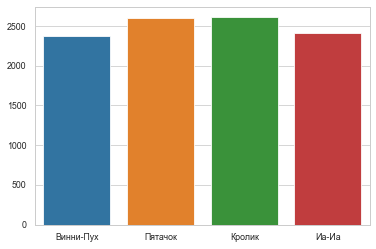

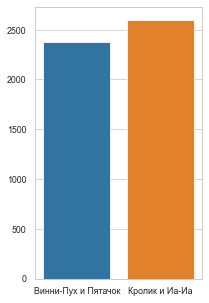

In [3]:
# Задание 1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
n=np.random.randint(0,24)
vinni=np.random.exponential(1, size=[10 ** 4, n])
pyatachok=np.random.normal(1,1, size=[10 ** 4, n])
krolik=np.random.poisson(1, size=[10 ** 4, n])
ia=2*(np.random.binomial(1,0.5, size=[10 ** 4, n]))
gonki=[vinni,
      pyatachok,
      krolik,
      ia]
pobeda=np.argmax(np.sum(gonki, axis=2), axis=0)
a=list(pobeda).count(0)
b=list(pobeda).count(1)
c=list(pobeda).count(2)
d=list(pobeda).count(3)
sns.set_context("paper")
sns.set_style('whitegrid')
sns.barplot(x=['Винни-Пух', 'Пятачок', 'Кролик', 'Иа-Иа'], y=[a,b,c,d])
plt.show()
# По результатам, Кролик, как правило, чаще выигрывает марафоны, затем идёт Пятачок, Иа-Иа и, наконец, Винни-Пух.

# Задание 2
team1=vinni+pyatachok
team2=krolik+ia
gonki_teams=[team1,
      team2]
pobeda_teams=np.argmax(np.sum(gonki, axis=2), axis=0)
e=list(pobeda).count(0)
f=list(pobeda).count(1)
plt.figure(figsize=(3,5))
sns.barplot(x=['Винни-Пух и Пятачок', 'Кролик и Иа-Иа'], y=[e,f])
plt.show()
# По результатам, объединение Кролика и Иа-Иа оказалось эффективнее, несмотря на то, что Пятачок изначально был на вторым.

## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [14]:
import requests as rqts
from bs4 import BeautifulSoup
import pandas as pd
def parse_page(search, page):
    url='https://www.avito.ru/moskva?q={}&p={}'.format(search, page)
    res=rqts.get(url)
    tree=BeautifulSoup(res.content, 'html.parser')
    products=tree.find_all('div', attrs={'class':"item__line"})
    data=[]
    metro=0
    dist=0
    for item in products:
        if item.find('span', {'class':"item-address-georeferences-item__content"}):
            metro=item.find('span', {'class':"item-address-georeferences-item__content"}).text
        else:
            metro=None 
        if item.find('span', {'class':"item-address-georeferences-item__after"}):
            dist=item.find('span', {'class':"item-address-georeferences-item__after"}).text
        else:
            dist=None        
        data.append({'Название объявления': item.find('a', {'class':'snippet-link'}).text,
                     'Ссылка на объявление': item.h3.a.get('href'),
                     'Цена': item.find('span', {'class':"snippet-price"}).text[2:-3],
                     "Метро": metro,
                     "Расстояние от метро": dist})    
    df=pd.DataFrame(data)
    return df
parse_page('ролики', 2)

,Название объявления,Ссылка на объявление,Цена,Метро,Расстояние от метро
0,Скейтборд Xiaomi Acton Electric Skateboard (Gr...,/moskva/sport_i_otdyh/skeytbord_xiaomi_acton_e...,15 000 ₽,Багратионовская,500 м
1,Dji mavic Air Combo,/moskva/sport_i_otdyh/dji_mavic_air_combo_1893...,58 000 ₽,Строгино,700 м
2,Разбирается на запчасти BMW X5 E70,/moskva/zapchasti_i_aksessuary/razbiraetsya_na...,Цена не указа,Котельники,600 м
3,Ролики раздвижные,/moskva/sport_i_otdyh/roliki_razdvizhnye_18786...,500 ₽,Юго-Западная,700 м
4,"Видеомонтаж, Промо-ролики, Обработка фото",/moskva/predlozheniya_uslug/videomontazh_promo...,1 000 ₽,Новослободская,600 м
5,Ролик натяжитель SKF на Форд Фокус 2,/moskva/zapchasti_i_aksessuary/rolik_natyazhit...,2 000 ₽,Улица академика Янгеля,100 м
6,Ролики,/moskva/sport_i_otdyh/roliki_1934620466,2 900 ₽,Медведково,400 м
7,Ролики,/moskva/sport_i_otdyh/roliki_1631690455,500 ₽,Улица Горчакова,500 м
8,Ролик Ремня Кондиционера Хино 500,/moskva/zapchasti_i_aksessuary/rolik_remnya_ko...,Цена не указа,Выхино,"1,2 км"
9,Ролики для душевой кабины,/moskva/kollektsionirovanie/roliki_dlya_dushev...,1 000 ₽,Охотный ряд,200 м


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 1 пункт
path='/Users/Дарья/Documents/Учеба/eds-spring-2020-hw2-Dasha-afk-master/data/walmart.csv'
data=pd.read_csv(path, sep=",")
print('Количество наблюдений: '+str(data.shape[0]))
print('Количество переменных: '+str(data.shape[1]))
print('Формат переменных:')
print(data.dtypes)
data['Date']=pd.to_datetime(data['Date'])
print("Первые и последние 5 наблюдений:")
data

Количество наблюдений: 418239
Количество переменных: 16
Формат переменных:
Store             int64
Date             object
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
dtype: object
Первые и последние 5 наблюдений:


,Store,Date,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,2010-02-05,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2010-02-12,1,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,2010-02-19,1,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,2010-02-26,1,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,2010-03-05,1,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418234,45,2012-09-21,98,467.30,False,B,118221,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,191.856704,8.684
418235,45,2012-09-28,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684
418236,45,2012-10-05,98,628.10,False,B,118221,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667
418237,45,2012-10-12,98,1061.02,False,B,118221,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667


In [3]:
# 2 пункт
for i in data.columns:
    a=round(100-(data.dropna(subset=[i]).shape[0])/(data.shape[0])*100)
    print(i+' - '+str(a)+'%')
    if a>60:
        del data[i]

Store - 0%
Date - 0%
Dept - 0%
Weekly_Sales - 0%
IsHoliday - 0%
Type - 0%
Size - 0%
Temperature - 0%
Fuel_Price - 0%
MarkDown1 - 65%
MarkDown2 - 74%
MarkDown3 - 68%
MarkDown4 - 68%
MarkDown5 - 65%
CPI - 0%
Unemployment - 0%


In [4]:
# 3 пункт
print("В выборке присутствует "+str(data.Store.max())+" магазинов и "+str(data.Dept.max())+" отделов в период с "+str(data.Date.min())+" по "+str(data.Date.max()))

В выборке присутствует 45 магазинов и 99 отделов в период с 2010-02-05 00:00:00 по 2012-10-19 00:00:00


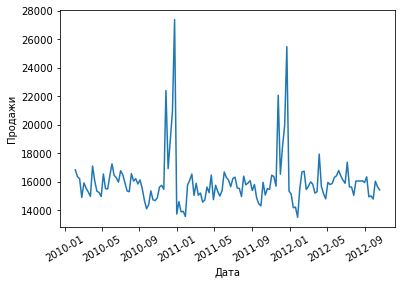

In [11]:
# 4 пункт
sales=sns.lineplot(x='Date', y='Weekly_Sales', data=data, ci=None)
sales.set_xlabel('Дата')
sales.set_ylabel('Продажи')
plt.xticks(rotation=30) 
plt.show()

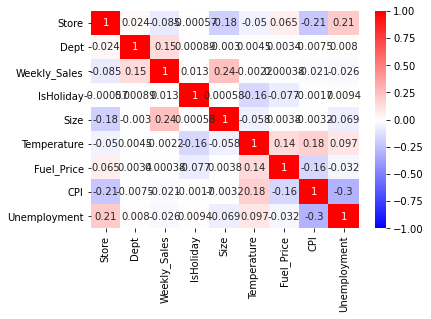

In [6]:
# 5 пункт
corr=data.corr()
sns.heatmap(corr,vmin=-1,vmax=1,cmap='bwr',annot=True)
plt.show()

Топ-5 магазинов по продажам: 20, 4, 14, 13, 2


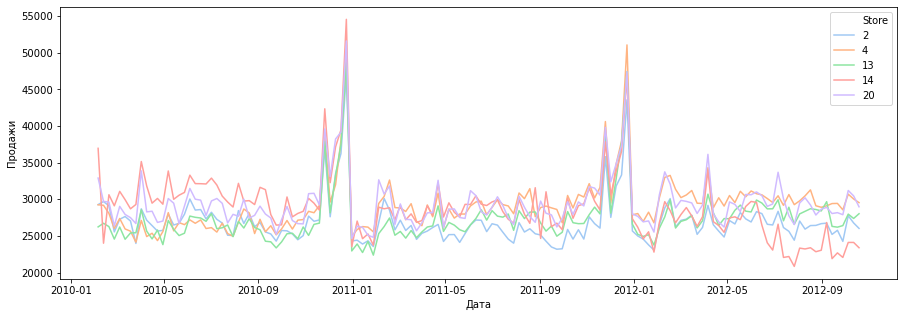

In [12]:
# 6 пункт
data2=pd.DataFrame(data, columns=['Store', 'Data', 'Weekly_Sales'])
max_sales=(data2.groupby('Store').sum()).sort_values(by=['Weekly_Sales'], ascending = False).head()
print('Топ-5 магазинов по продажам: '+str(list(max_sales.index))[1:-1])
data1=data.loc[data['Store'].isin(max_sales.index)]
plt.figure(figsize=(15,5))
sales2=sns.lineplot(x='Date', y='Weekly_Sales', data=data1, ci=None, hue='Store', legend="full", palette='pastel')
sales2.set_xlabel('Дата')
sales2.set_ylabel('Продажи')
plt.show()

Топ-10 отделов по продажам: 92, 95, 90, 38, 72, 91, 40, 2, 94, 93


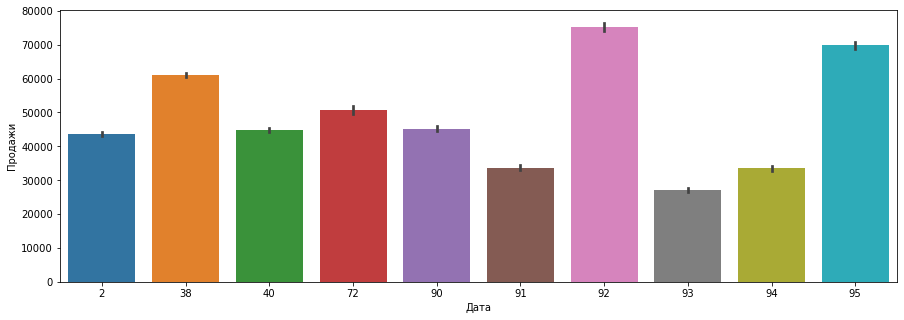

In [13]:
# 7 пункт
a=data.loc[pd.to_datetime('2011-01-01')<pd.to_datetime(data['Date'])]
b=a.loc[pd.to_datetime(a['Date'])<pd.to_datetime('2012-01-01')]
max_sales2=b.loc[data['Type'] == 'A'].groupby('Dept').sum().sort_values(by=['Weekly_Sales'], ascending = False).head(10)
print('Топ-10 отделов по продажам: '+str(list(max_sales2.index))[1:-1])
data2=data.loc[data['Dept'].isin(max_sales2.index)]
plt.figure(figsize=(15,5))
sales3=sns.barplot(x='Dept', y='Weekly_Sales', data=data2)
sales3.set_xlabel('Дата')
sales3.set_ylabel('Продажи')
plt.show()

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# 1 пункт
def vk_download(method, parameters):
    
    url1 = 'https://api.vk.com/method/' + method + '?' + parameters + '&access_token=' + token + '&v=' + version
    response = requests.get(url1) 
    infa = response.json()
    return infa

with open('input.txt') as f:
    token = f.read()
group_id = 'personasvk'  # взяли из ссылки на группу
bdays=[]
ids=[]
data = vk_download('groups.getMembers', 'group_id={}&fields=bdate&count=1000'.format(group_id))
data = data['response']
# 2 пункт
for item in data['items']:
    try:
        item['bdate'], item['id']
        if len(item['bdate'])>6:
            bdays.append(time.strptime(item['bdate'][:-5], "%d.%m")[1])
        ids.append(item['id'])
    except:
        None
myDict=dict(zip(ids, bdays))
# 3 пункт
paradox=sns.countplot(x=bdays)
paradox.set_xlabel('Месяц рождения')
paradox.set_ylabel('Количество людей')
plt.show()
#Нет, такое распределение совсем не похоже на нормальное

FileNotFoundError: [Errno 2] No such file or directory: 'input.txt'